In [185]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#write a example dataset array good with db scan
# data_example = np.array([[1, 2], [2, 2], [2, 3],[2.5,2.5],[5,7], [5,9], [6,8],[5.5,9.5],[10,10],[10,11],[11,11],[11,12],[11.5,11.5]])

data = pd.read_csv('tracks_features.csv', nrows=500)


In [186]:
data.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                500 non-null    object 
 1   name              500 non-null    object 
 2   album             500 non-null    object 
 3   album_id          500 non-null    object 
 4   artists           500 non-null    object 
 5   artist_ids        500 non-null    object 
 6   track_number      500 non-null    int64  
 7   disc_number       500 non-null    int64  
 8   explicit          500 non-null    bool   
 9   danceability      500 non-null    float64
 10  energy            500 non-null    float64
 11  key               500 non-null    int64  
 12  loudness          500 non-null    float64
 13  mode              500 non-null    int64  
 14  speechiness       500 non-null    float64
 15  acousticness      500 non-null    float64
 16  instrumentalness  500 non-null    float64
 1

In [188]:
#preprocessing data
# columns_to_scale = ['danceability', 'energy']
# scaler = StandardScaler()
# scaler.fit(data[columns_to_scale])
# data_scaled = data.copy()
# data_scaled[columns_to_scale] = scaler.transform(data[columns_to_scale])

columns_to_scale = ['danceability', 'energy']
scaler = MinMaxScaler()
scaler.fit(data[columns_to_scale])
data_scaled = data.copy()
data_scaled[columns_to_scale] = scaler.transform(data[columns_to_scale])

In [189]:
X = data_scaled.iloc[:, [9,10]].values
X

array([[0.47942606, 0.98157248],
       [0.63239654, 0.96007371],
       [0.29562433, 0.97338247],
       [0.44385154, 0.97031122],
       [0.42725009, 0.93140868],
       [0.27546543, 0.84848485],
       [0.41657773, 0.97952498],
       [0.25056326, 0.87407862],
       [0.44503735, 0.88329238],
       [0.45333808, 0.86179361],
       [0.46282462, 0.7010647 ],
       [0.39523301, 0.96826372],
       [0.48891261, 0.85565111],
       [0.46401044, 0.77784603],
       [0.56480493, 0.84234234],
       [0.53397367, 0.52600328],
       [0.41776355, 0.80548731],
       [0.6027511 , 0.76351351],
       [0.40946282, 0.82289107],
       [0.53871695, 0.753276  ],
       [0.54464603, 0.59152334],
       [0.51381478, 0.60790336],
       [0.85533025, 0.90479115],
       [0.61816673, 0.96109746],
       [0.59207874, 0.77989353],
       [0.69405905, 0.56081081],
       [0.90987786, 0.80446355],
       [0.84940116, 0.61404586],
       [0.63951144, 0.92321867],
       [0.72726195, 0.89250614],
       [0.

Calculate the parameters

In [190]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X) # fitting the data to the object
distances,indices=nbrs.kneighbors(X) # finding the nearest neighbours

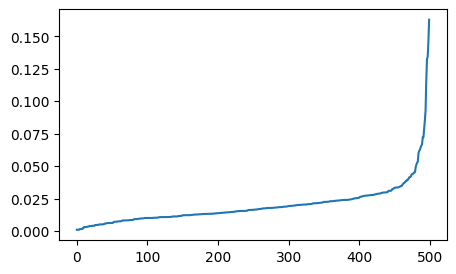

In [191]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

minPoints = 18
Eps = 5

Implementing DBScan

In [210]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.05, min_samples = 4).fit(X) # fitting the model
Y = dbscan.fit_predict(X) # getting the predicted values
labels = dbscan.labels_ # getting the labels
labels


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0, -1,  0,  0,  0,  2,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  2,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  4, -1,  0,  0,  0,  0,  4,  0,  4,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

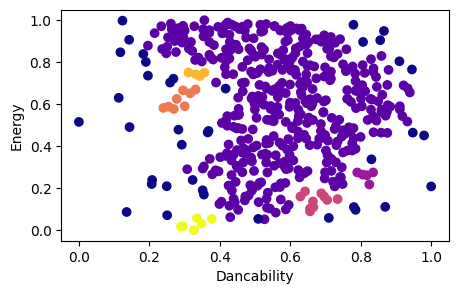

In [211]:
# Plot the clusters
plt.scatter(X[:, 0], X[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Dancability") # X-axis label
plt.ylabel("Energy") # Y-axis label
plt.show() # showing the plot

In [212]:
silhouette_score(X, labels)


-0.23805348851144414

In [213]:
davies_bouldin_score(X, labels)

2.1604151001699616